# Extração Automática e Agrupamento de Palavras-chave em Artigos Científicos Utilizando Mineração de Texto - Carbono

Autor: Luiz Roberto Albano Junior <luiz.albano@unesp.br>

---

### Instalação de requisitos

**Alerta:** A instalação dos pacotes abaixo pode consumir cerca de 1Gb de espaço.

In [2]:
!pip install bertopic
!python -m spacy download pt_core_news_md


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 148, in _get_module_details
  File "<frozen runpy>", line 112, in _get_module_details
  File "/Users/luiz/Documents/Mestrado/Unesp/Mineracao/.venv/lib/python3.12/site-packages/spacy/__init__.py", line 6, in <module>
    from .errors import setup_default_warnings
  File "/Users/luiz/Documents/Mestrado/Unesp/Mineracao/.venv/lib/python3.12/site-packages/spacy/errors.py", line 3, in <module>
    from .compat import Literal
  File "/Users/lu

### Importação das bibliotecas necessárias

In [1]:
import sqlite3 as db
import pandas as pd
import spacy
from bertopic import BERTopic


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/luiz/Documents/Mestrado/Unesp/Mineracao/.venv/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/luiz/Documents/Mestrado/Unesp/Mineracao/.venv/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/luiz/Documents/Mestrado/Unesp/Mineracao/.venv/lib/python3.12/site-package

## Coleta de dados

A base de dados de artigos científicos foi obtida a partir da plataforma SciELO Brasil (https://www.scielo.br/). A escolha da plataforma deu-se após pesquisas de datasets contendo dados de artigos científicos. A excassez de um banco de dados confiável e que disponibilizasse o conteúdo destes artigos, fez com que pesquisasse serviços e formas de obter estas informações diretamente nas plataformas.

Após a análise de algumas plataformas, verifiquei a plataforma SciELO possibilitava realizar a coleta dos dados a partir de um script que realizou a "raspagem" dos dados. O download da base utilizada para este trabalho pode ser baixada em:<br>
https://drive.google.com/file/d/1LAfZSNz7AtfgZrbwKm2STH5FBvNBz2u-/view?usp=sharing
<br><br>
Formato: SQLite

O código para raspagem dos dados está dispon;ivel em:<br>
https://github.com/prof-LuizAlbano/unesp-mineracao-dados/blob/analises_luiz/projeto-final-albano/webcrawler-scielo.py

In [2]:
conn = db.connect("dataset/scielo.papers.carbono.db")
cur = conn.cursor()

resultset = cur.execute("SELECT * FROM papers WHERE tokens IS NULL")
papers = resultset.fetchall()

## Limpeza e Pré-processamento de Texto (Tokenização)

In [3]:
pln = spacy.load("pt_core_news_md")

Tokenização dos conteúdos

In [4]:
for paper in papers:
    document = pln(paper[7])
    
    tokens = []
    for token in document:
        if token.pos_ == "VERB" and token.is_alpha and not (token.is_stop) :
            tokens.append(str.lower(token.lemma_))
        elif not(token.pos_ == "VERB")  and token.is_alpha and not(token.is_stop) :
            tokens.append(str.lower(token.text))
    
    # Atualiza o registro na tabela
    cur.execute("UPDATE papers SET tokens = ? WHERE ID = ?", (" ".join(tokens), paper[0]))
    conn.commit()

## Agrupamento

Seleção dos dados:

In [5]:
conn = db.connect("dataset/scielo.papers.carbono.db")

df = pd.read_sql_query("SELECT * FROM papers", conn)
#df = pd.read_sql_query("SELECT * FROM papers", conn)
df.sample()

,ID,Language,Title,Subtitle,Edition,Paper_Year,DOI,Content,Authors,URL,PubDate,tokens
639,640,pt,Sistemas de preparo do solo e culturas de cobe...,Soil tillage systems and cover crops in organi...,Rev. Bras. Ciênc. Solo 35 (2),Abr 2011,https://doi.org/10.1590/S0100-06832011000200029,DIVISÃO 3 - USO E MANEJO DO SOLO 3.2 - MANEJO...,"Cunha,EurâimideQueiroz; Stone,LuísFernando; Fe...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,divisão uso manejo solo manejo conservação sol...


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vetorização com TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["tokens"])

print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1035052 stored elements and shape (1309, 89512)>
  Coords	Values
  (0, 43925)	0.001783739816255781
  (0, 55760)	0.007934339711087392
  (0, 15797)	0.005495711100422875
  (0, 13706)	0.002815198786488816
  (0, 22203)	0.009433300228297338
  (0, 27357)	0.008806101097322667
  (0, 22611)	0.010505504224624358
  (0, 1623)	0.0029612907583937823
  (0, 66076)	0.002298172884407878
  (0, 61167)	0.01573464991694651
  (0, 86917)	0.008267318224051587
  (0, 64826)	0.004066249582539021
  (0, 10833)	0.015511671438760954
  (0, 60623)	0.00690552354739705
  (0, 43538)	0.008015923642102143
  (0, 55761)	0.00317925224497393
  (0, 15798)	0.004211275712389883
  (0, 44198)	0.034033372780690754
  (0, 69208)	0.004198110838133221
  (0, 27128)	0.11724048543943717
  (0, 50196)	0.0071066979700209745
  (0, 36293)	0.017278936397493987
  (0, 66072)	0.017874425958593624
  (0, 37720)	0.011181322970382183
  (0, 26206)	0.010594834513944013
  :	:
  (1308, 75610)	0.07

/Users/luiz/Documents/Mestrado/Unesp/Mineracao/.venv/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


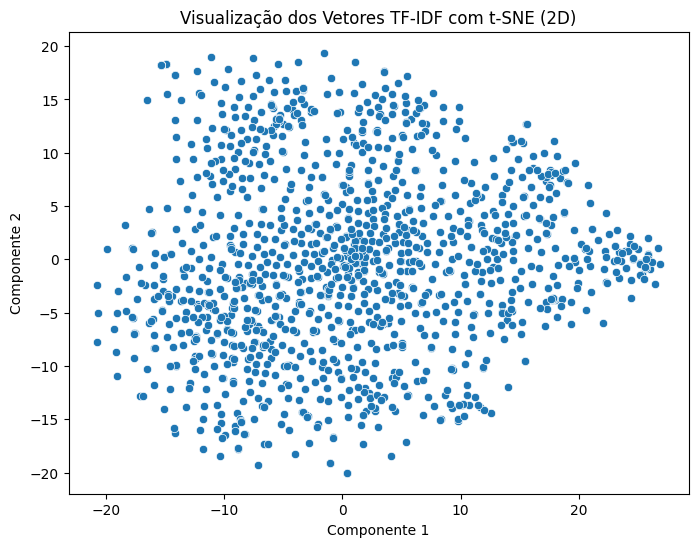

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Redução para 2D com t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# Visualização dos vetores TF-IDF em 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1])
plt.title("Visualização dos Vetores TF-IDF com t-SNE (2D)")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

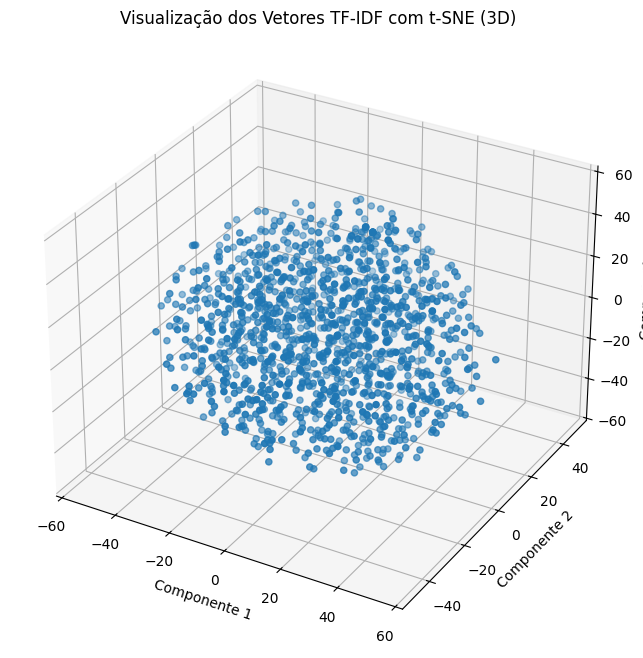

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Redução para 3D com t-SNE
tsne_3d = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X.toarray())

# Visualização dos vetores TF-IDF em 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2])
ax.set_title("Visualização dos Vetores TF-IDF com t-SNE (3D)")
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
ax.set_zlabel("Componente 3")
plt.show()


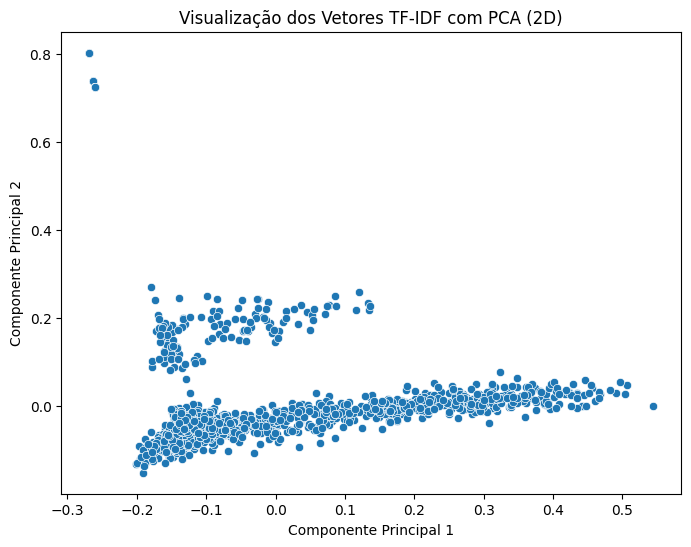

In [9]:
from sklearn.decomposition import PCA

# Redução para 2D com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Visualização dos vetores TF-IDF em 2D com PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])
plt.title("Visualização dos Vetores TF-IDF com PCA (2D)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


Aplicação do Algoritmo de Clustering (K-means)


In [10]:
from sklearn.cluster import KMeans

# Definindo o número de clusters (por exemplo, 2)
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_pca)

# Atribuindo os rótulos de cluster ao DataFrame
df["cluster"] = kmeans.labels_

df.sample(20)


,ID,Language,Title,Subtitle,Edition,Paper_Year,DOI,Content,Authors,URL,PubDate,tokens,cluster
984,985,pt,Redes neurais artificiais aplicadas para a pre...,Behavior dynamic-mechanic of [0º/45º/90º/0º]S ...,Matéria (Rio J.) 12 (2),2007,https://doi.org/10.1590/S1517-70762007000200013,Redes neurais artificiais aplicadas para a pr...,"BritoJúnior,C.A.R.; Bezerra,E.M.; Pardini,L.C....",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,redes neurais artificiais aplicar predição com...,1
1103,1104,pt,Propriedades físicas do solo sob preparo conve...,Physical soil properties of conventional tilla...,Rev. Bras. Ciênc. Solo 28 (1),Fev 2004,https://doi.org/10.1590/S0100-06832004000100015,SEÇÃO VI - MANEJO E CONSERVAÇÃO DO SOLO E DA ...,"Bertol,I.; Albuquerque,J.A.; Leite,D.; Amaral,...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,seção vi manejo conservação solo água propried...,0
1049,1050,pt,Efeitos ototóxicos da exposição ao monóxido de...,,Pró-Fono R. Atual. Cient. 17 (3),Dez 2005,https://doi.org/10.1590/S0104-56872005000300014,ARTIGO DE REVISÃO DE LITERATURA Efeitos ototó...,"Lacerda,Adriana; Leroux,Tony; Morata,Thais.",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,artigo revisão literatura efeitos ototóxicos e...,1
678,679,pt,Agregados em um Latossolo sob sistema plantio ...,Aggregates in a Rhodic Ferralsol under no-till...,Pesq. agropec. bras. 45 (12),Dez 2010,https://doi.org/10.1590/S0100-204X2010001200021,SOLOS Agregados em um Latossolo sob sistema p...,"Garcia,RodrigoArroyo; Rosolem,CiroAntonio.",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,solos agregados latossolo plantio direto rotaç...,0
1013,1014,pt,Quantificação do estoque de carbono e avaliaçã...,Quantification of carbon stock and economic ev...,Rev. Árvore 30 (3),Jun 2006,https://doi.org/10.1590/S0100-67622006000300011,Quantificação do estoque de carbono e avaliaç...,"Paixão,FaustoAraújo; Soares,CarlosPedroBoechat...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,quantificação estoque carbono avaliação econôm...,1
1073,1074,pt,Otimização da preparação de eletrodo de pasta ...,Optimization of the carbon paste electrode pre...,Quím. Nova 27 (5),Out 2004,https://doi.org/10.1590/S0100-40422004000500009,ARTIGO Otimização da preparação de eletrodo d...,"Pereira,ArnaldoCésar; Kubota,LauroTatsuo.",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,artigo otimização preparação eletrodo pasta ca...,1
31,32,pt,O aproveitamento energético do biogás como fer...,The energy use of biogas as a tool for the goa...,Interações (Campo Grande) 23 (4),Oct-Dec 2022,https://doi.org/10.20435/inter.v23i4.3704,1 INTRODUÇÃO As diversas ações antropogênicas...,"Lins,LeonardoPereira; Furtado,AndréiaCristina;...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,introdução diversas ações antropogênicas urban...,1
489,490,pt,Torrefação e carbonização de briquetes de resí...,Torrefaction and carbonization of briquettes m...,Rev. bras. eng. agríc. ambient. 16 (11),Nov 2012,https://doi.org/10.1590/S1415-43662012001100015,ENERGIA NA AGRICULTURA Torrefação e carboniza...,"Protásio,ThiagodeP.; Bufalino,Lina; Mendes,Raf...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,energia agricultura torrefação carbonização br...,1
163,164,pt,Estoque e perda de necromassa da vegetação len...,Stock and loss of necromass of trees on a vege...,Rodriguésia 70,2019,https://doi.org/10.1590/2175-7860201970060,Introdução As florestas tropicais são grandes...,"Carneiro,KarlaMoniqueSilva; Reis,SimoneMatias;...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,introdução florestas tropicais reservatórios c...,1
1308,1309,pt,Algumas caraterísticas químicas dos solos do e...,,Bragantia 6 (4),1946,https://doi.org/10.1590/S0006-87051946000400001,Algumas caraterísticas químicas dos solos do ...,"Catani,R.A.; Küpper,A..",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,caraterísticas químicas solos paulo i

Visualizaçào dos Clusters

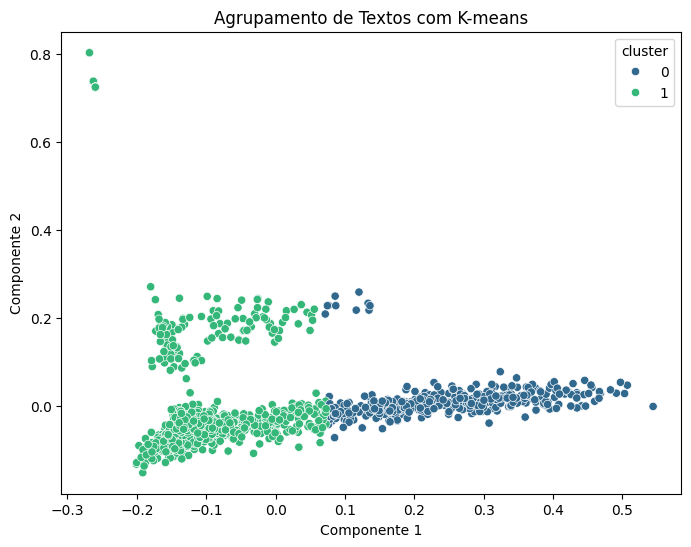

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adiciona os componentes reduzidos ao DataFrame para visualização
df["Componente 1"] = X_pca[:, 0]
df["Componente 2"] = X_pca[:, 1]

# Visualiza os clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Componente 1", y="Componente 2", hue="cluster", palette="viridis")
plt.title("Agrupamento de Textos com K-means")
plt.show()


Agrupamento com DBSCAN


In [12]:
from sklearn.cluster import DBSCAN

# Configurando DBSCAN (eps define a distância máxima para formar um cluster)
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(X_pca)

# Adicionando os rótulos ao DataFrame
df["cluster_dbscan"] = dbscan_labels
df.sample(20)


,ID,Language,Title,Subtitle,Edition,Paper_Year,DOI,Content,Authors,URL,PubDate,tokens,cluster,Componente 1,Componente 2,cluster_dbscan
170,171,pt,Analysis of the efficiency of strengthening de...,,Rev. IBRACON Estrut. Mater. 11 (06),Dec 2018,https://doi.org/10.1590/S1983-41952018000600013,1. Introduction Reinforced concrete structure...,"RODRIGUES,P.C.; ARAÚJO,D.L..",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,introduction reinforced concrete structures ar...,1,-0.160171,0.098100,0
86,87,pt,Desenvolvimento de compósitos ZnC2O4/xerogel d...,Development of ZnC2O4/carbon xerogel composite...,Matéria (Rio J.) 26 (02),2021,https://doi.org/10.1590/S1517-707620210002.12998,"1. INTRODUÇÃO Atualmente, cada vez mais se to...","Moraes,NicolasPercianide; Bacetto,LeticiaAraúj...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,introdução atualmente tornar importante conser...,1,-0.119191,-0.046240,0
1182,1183,pt,Qualidade da farinha obtida de grãos de trigo ...,Quality of flour obtained from wheat grains fu...,Rev. bras. eng. agríc. ambient. 6 (2),2002,https://doi.org/10.1590/S1415-43662002000200028,NOTAS PRÉVIAS Qualidade da farinha obtida de ...,"Faroni,LêdaR.D.; Berbert,PedroA.; Martinazzo,A...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,notas prévias qualidade farinha obter grãos tr...,1,-0.117933,-0.053684,0
702,703,pt,Distribuição de agregados e carbono orgânico e...,Distribution of aggregates and organic carbon ...,Rev. bras. eng. agríc. ambient. 14 (9),Set 2010,https://doi.org/10.1590/S1415-43662010000900001,"MANEJO DE SOLO, ÁGUA E PLANTAS Distribuição d...","Oliveira,VeronildoS.; Rolim,MárioM.; Vasconcel...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,manejo solo água plantas distribuição agregado...,0,0.261847,0.015847,0
15,16,pt,Soluções baseadas na Natureza em projetos de r...,,Estud. av. 37 (109),Sep-Dec 2023,https://doi.org/10.1590/s0103-4014.2023.37109.018,Introdução A expansão urbana representa modif...,"KAAM,EVANDRONOGUEIRA; GALLARDO,AMARILISLUCIACA...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,introdução expansão urbana representar modific...,1,-0.077890,-0.023551,0
476,477,pt,Perda de matéria seca em grãos de milho armaze...,Dry matter loss in corn grains stored in airti...,Rev. Ciênc. Agron. 43 (4),Dez 2012,https://doi.org/10.1590/S1806-66902012000400008,ARTIGO CIENTÍFICO Perda de matéria seca em gr...,"Santos,SilmaraBispodos; Martins,MarcioArêdes; ...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,artigo científico perda matéria seca grãos mil...,1,-0.046238,-0.051781,0
296,297,pt,Efeito do dióxido de carbono e da radiação sol...,Effect of carbon dioxide and sunlight on algae...,Rev. Ambient. Água 11 (3),Set 2016,https://doi.org/10.4136/ambi-agua.1877,1. INTRODUÇÃO As microalgas são consideradas ...,"Ferreira,TiagoBorges; González,JesúsFernández;...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,introdução microalgas considerar origem fitopl...,1,-0.070375,-0.045901,0
498,499,pt,"Biomassa e Carbono em Euterpe oleracea Mart., ...",Biomass and Carbon in Euterpe oleracea Mart. o...,Floresta Ambient. 19 (3),Jul-Sep 2012,https://doi.org/10.4322/floram.2012.039,1. INTRODUÇÃO Dentre os diversos serviços amb...,"Miranda,DirceuLúcioCarneirode; Sanquetta,Carlo...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,introdução dentre diversos serviços ambientais...,1,-0.020684,-0.062267,0
868,869,pt,Simulação da dinâmica do carbono do solo numa ...,Dynamics simulation of soil carbon in a small ...,Pesq. agropec. bras. 43 (6),Jun 2008,https://doi.org/10.1590/S0100-204X2008000600011,SOLOS Simulação da dinâmica do carbono do sol...,"Lopes,Fabíola; Merten,GustavoHenrique; Mielnic...",http://www.scielo.br/scielo.php?script=sci_art...,2024-11-10,solos simulação dinâmica carbono solo microbac...,0,0.150017,-0.017083,0
1156,1157,pt,O regime internacional de mudança climática e ...,The international regime on climate 